# SGD Classifier & Image Preprocessing
* SGD Classifier를 통해 이미지를 분류하는 실습
* 5/22일부터 시작되는 프로젝트 과제에서 이미지를 활용해주어야 하기 때문에, 관련 실습 진행

## SGD Classifier & MNIST DATASET
* MNIST 데이터셋은 미국 고등학생의 글씨체를 모아놓은 데이터입니다.
* 이미지 데이터를 SGD를 통해서 분류해봅시다.

##### 이후 단원에서 CNN을 배운 이후, 본 데이터를 동일하게 분류했을 때, 정확도 변화를 관측해봅시다.

In [15]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [16]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [17]:
X, y = mnist["data"].to_numpy(), mnist["target"].to_numpy()
print(X.shape, y.shape)

(70000, 784) (70000,)


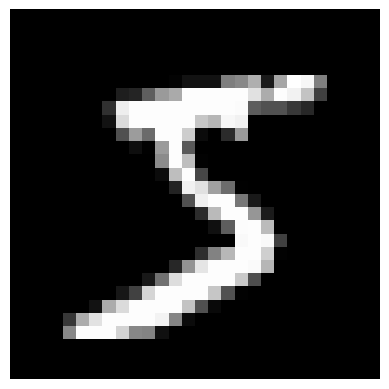

In [18]:
import matplotlib.pyplot as plt
digit = X[0]
digit_image = digit.reshape(28, 28)
plt.imshow(digit_image, cmap="gray")
plt.axis("off")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1213)

In [20]:
X_train.shape, X_test.shape

((56000, 784), (14000, 784))

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train) #모델 훈련이 원래 오래 걸립니다.

In [ ]:
print(f"Accuracy: {sgd.score(X_test, y_test):.2f}")

Accuracy: 0.85


In [ ]:
import pandas as pd

pred = sgd.predict(X_test)
pd.DataFrame(zip(pred, y_test), columns=['pred', 'label'])

NameError: ignored

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1396
           1       0.95      0.98      0.96      1538
           2       0.81      0.92      0.86      1217
           3       0.81      0.88      0.84      1278
           4       0.84      0.94      0.89      1290
           5       0.83      0.73      0.78      1416
           6       0.98      0.76      0.86      1782
           7       0.73      0.95      0.82      1126
           8       0.74      0.81      0.78      1223
           9       0.89      0.71      0.79      1734

    accuracy                           0.85     14000
   macro avg       0.85      0.86      0.85     14000
weighted avg       0.86      0.85      0.85     14000



## Image Classification
* How to Process Image
* 이후 진행할 프로젝트에서 이미지를 활용하기 위해 진행

In [ ]:
# Common Library
import matplotlib.pyplot as plt # matplotlib
import numpy as np # numpy import
import os # path management
from glob import glob # file management as linux

### 1. Get File list
* os
* glob

In [ ]:
BASE_URL = "./sample_data"
os.listdir(BASE_URL) # 보통은 이렇게 불러와서 BASE_URL과 결합하여 사용함

['anscombe.json',
 'README.md',
 'california_housing_train.csv',
 'mnist_test.csv',
 'mnist_train_small.csv',
 'california_housing_test.csv']

In [ ]:
glob(f"{BASE_URL}/*")

['./sample_data/anscombe.json',
 './sample_data/README.md',
 './sample_data/california_housing_train.csv',
 './sample_data/mnist_test.csv',
 './sample_data/mnist_train_small.csv',
 './sample_data/california_housing_test.csv']

### Load Image
* OpenCV2
* PILLOW

In [ ]:
! curl https://i.pinimg.com/originals/68/c9/14/68c914b532fd80d8c6f4cb0415206d85.jpg > camp.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 82841  100 82841    0     0   963k      0 --:--:-- --:--:-- --:--:--  963k


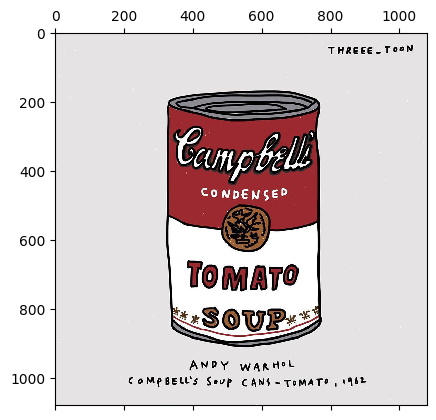

In [ ]:
from PIL import Image
image_path = "./camp.jpg"

image_pil = Image.open(image_path)
plt.matshow(np.array(image_pil))

In [ ]:
np.array(image_pil).shape

(1080, 1080, 3)

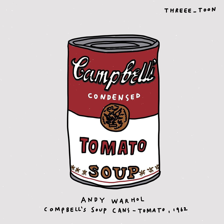

In [ ]:
image_pil.resize([224,224])

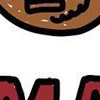

In [ ]:
x_range = (500, 600)
y_range = (600, 700)
image_pil.crop([x_range[0], y_range[0], x_range[1], y_range[1]])

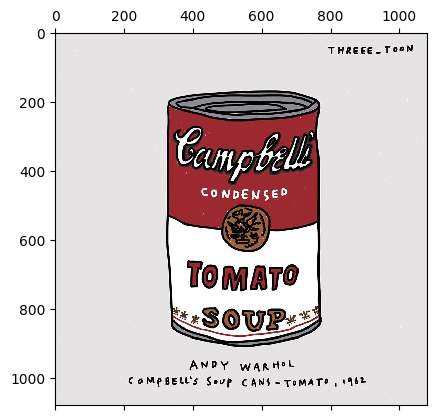

In [ ]:
import cv2 # pip3 install opencv-python
image_cv = cv2.imread(image_path) # imread (RGB 순서가 아니라 BRG 순서로 넘파이를 불러온다.)
image_cv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB) # cv2에서 BRG를 RGB순서로 변경한다.
plt.matshow(image_cv)

In [ ]:
dst = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY).reshape(1080,1080,1)
cv2.imwrite("camp_gray.jpg", dst)

True

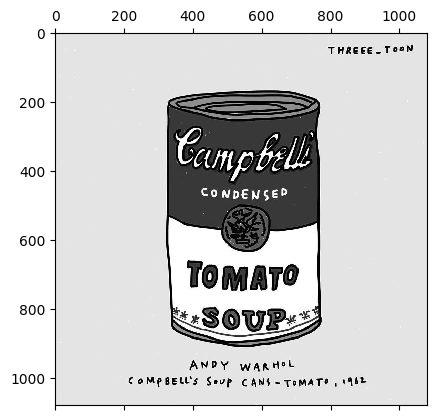

In [ ]:
image_gray = cv2.imread("camp_gray.jpg")
plt.matshow(image_gray)

## Facial Landmark Detection

In [ ]:
! curl https://skb.skku.edu/_attach/professor/AlZOAFmSEHBNkMyPuvAJ.jpg > han.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 70823  100 70823    0     0  66375      0  0:00:01  0:00:01 --:--:-- 66375


In [ ]:
! wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1pk1o6FkcHg3pF5-IywrpcieIDqZOL3cb' -O shape_predictor_68_face_landmarks.dat

--2023-04-24 09:40:48--  https://docs.google.com/uc?export=download&id=1pk1o6FkcHg3pF5-IywrpcieIDqZOL3cb
Resolving docs.google.com (docs.google.com)... 142.250.136.101, 142.250.136.100, 142.250.136.138, ...
Connecting to docs.google.com (docs.google.com)|142.250.136.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-8k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/70t6hdu1jvmpdk38kgt5nqa8dr3s7om5/1682329200000/00253795494504996225/*/1pk1o6FkcHg3pF5-IywrpcieIDqZOL3cb?e=download&uuid=e345c1fe-a5b6-45fb-b7fc-27f9e5dad39f [following]
--2023-04-24 09:40:50--  https://doc-04-8k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/70t6hdu1jvmpdk38kgt5nqa8dr3s7om5/1682329200000/00253795494504996225/*/1pk1o6FkcHg3pF5-IywrpcieIDqZOL3cb?e=download&uuid=e345c1fe-a5b6-45fb-b7fc-27f9e5dad39f
Resolving doc-04-8k-docs.googleusercontent.com (doc-04-8k-docs.googleusercontent.com)... 64.233.182.132, 2607:f

In [ ]:
import cv2 # pip3 install opencv-python
import imutils # pip3 install imutils

image_cv = cv2.imread("./han.jpg") # imread (RGB 순서가 아니라 BRG 순서로 넘파이를 불러온다.)
image_cv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB) # cv2에서 BRG를 RGB순서로 변경한다.
image = imutils.resize(image_cv, width=500)

In [ ]:
import dlib
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [ ]:
face_detector = detector(image, 1)

for face in face_detector:
        # face wrapped with rectangle
        image = cv2.rectangle(image, (face.left(), face.top()), (face.right(), face.bottom()),
                      (0, 0, 255), 3)
        landmarks = predictor(image, face)
        for p in landmarks.parts():
            image = cv2.circle(image, (p.x, p.y), 1, (0, 0, 255), -1)

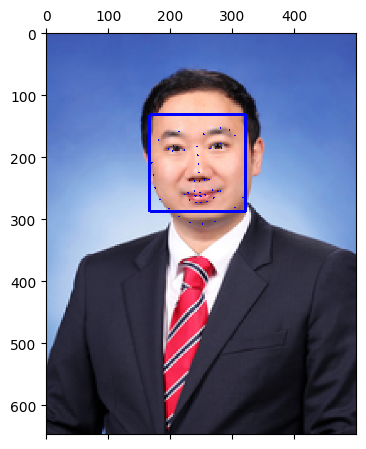

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(image)

# 실습과제

* SGD Classifier를 활용하여 MNIST dataset을 분류해보세요.
* 이 때, 다양한 파라미터 값을 바꿔보며 성능 변화를 관찰하세요.
* reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

In [24]:
# Your Code Here

# max_iter = [1000, 2000, 3000]
# loss_method = ['hinge', 'log_loss','squared_hinge', 'perceptron']
# tol_value = [0.003, 0.001, 0.0001]
# iter = 1000
# loss = 'hinge'
# tol = 0.003

# for iter in max_iter:
#     sgd = SGDClassifier(max_iter=iter, loss=loss, tol=tol, n_jobs=-1)
#     sgd.fit(X_train, y_train) 
#     pred = sgd.predict(X_test)
#     print(f"max_iter : {iter}, loss_method : {loss}, tol_value : {tol}, accuracy : {sgd.score(X_test, y_test):.4f}")
#     print(classification_report(pred, y_test))

# for loss in loss_method :
#     sgd = SGDClassifier(max_iter=iter, loss=loss, tol=tol, n_jobs=-1)
#     sgd.fit(X_train, y_train) 
#     pred = sgd.predict(X_test)
#     print(f"max_iter : {iter}, loss_method : {loss}, tol_value : {tol}, accuracy : {sgd.score(X_test, y_test):.4f}")
#     print(classification_report(pred, y_test))

# for tol in tol_value :
#     sgd = SGDClassifier(max_iter=iter, loss=loss, tol=tol, n_jobs=-1)
#     sgd.fit(X_train, y_train) 
#     pred = sgd.predict(X_test)
#     print(f"max_iter : {iter}, loss_method : {loss}, tol_value : {tol}, accuracy : {sgd.score(X_test, y_test):.4f}")
#     print(classification_report(pred, y_test))

# 시간이 너무 오래걸려 하나만 실행하겠습니다.
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
import pandas as pd

pred = sgd.predict(X_test)
pd.DataFrame(zip(pred, y_test), columns=['pred', 'label'])

sgd = SGDClassifier(max_iter=1000, loss='perceptron', tol=0.003, n_jobs=-1)
sgd.fit(X_train, y_train) 
pred = sgd.predict(X_test)
print(f"max_iter : 1000, loss_method : perceptron , tol_value : 0.003, accuracy : {sgd.score(X_test, y_test):.4f}")
print(classification_report(pred, y_test))

max_iter : 1000, loss_method : perceptron , tol_value : 0.003, accuracy : 0.8609
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1379
           1       0.98      0.90      0.94      1746
           2       0.79      0.93      0.86      1167
           3       0.84      0.84      0.84      1379
           4       0.91      0.88      0.89      1481
           5       0.86      0.77      0.81      1392
           6       0.88      0.98      0.93      1239
           7       0.70      0.97      0.81      1058
           8       0.77      0.81      0.79      1280
           9       0.91      0.66      0.77      1879

    accuracy                           0.86     14000
   macro avg       0.86      0.87      0.86     14000
weighted avg       0.87      0.86      0.86     14000

